This is based on Lesson 1

In [1]:
from fastai import *
from fastai.vision import *

In [2]:
help(untar_data)

Help on function untar_data in module fastai.datasets:

untar_data(url:str, fname:Union[pathlib.Path, str]=None, dest:Union[pathlib.Path, str]=None, data=True, force_download=False) -> pathlib.Path
    Download `url` to `fname` if it doesn't exist, and un-tgz to folder `dest`.



In [3]:
print(URLs.PETS)

https://s3.amazonaws.com/fast-ai-imageclas/oxford-iiit-pet


In [4]:
path = untar_data(URLs.PETS)  # Data will be downloaded and extracted on the first execution

In [5]:
path

PosixPath('/home/basil/.fastai/data/oxford-iiit-pet')

In [6]:
path.ls()

[PosixPath('/home/basil/.fastai/data/oxford-iiit-pet/annotations'),
 PosixPath('/home/basil/.fastai/data/oxford-iiit-pet/images')]

In [7]:
path_anno = path/'annotations'
path_img = path/'images'

In [8]:
# get_image_files

fnames = get_image_files(path_img)
fnames[:5]

[PosixPath('/home/basil/.fastai/data/oxford-iiit-pet/images/Abyssinian_1.jpg'),
 PosixPath('/home/basil/.fastai/data/oxford-iiit-pet/images/Abyssinian_10.jpg'),
 PosixPath('/home/basil/.fastai/data/oxford-iiit-pet/images/Abyssinian_100.jpg'),
 PosixPath('/home/basil/.fastai/data/oxford-iiit-pet/images/Abyssinian_101.jpg'),
 PosixPath('/home/basil/.fastai/data/oxford-iiit-pet/images/Abyssinian_102.jpg')]

In [9]:
np.random.seed(2)
pat = r'/([^/]+)_\d+.jpg$'

Reference : https://medium.com/@youknowjamest/parsing-file-names-using-regular-expressions-3e85d64deb69

In [10]:
pat

'/([^/]+)_\\d+.jpg$'

In [11]:
# from_name_re

data = ImageDataBunch.from_name_re(path_img,
                                   fnames,
                                   pat,
                                   ds_tfms=get_transforms(),
                                   size=224)

In [17]:
help(ImageDataBunch.from_name_re)

Help on method from_name_re in module fastai.vision.data:

from_name_re(path:Union[pathlib.Path, str], fnames:Collection[pathlib.Path], pat:str, valid_pct:float=0.2, **kwargs) method of builtins.type instance
    Create from list of `fnames` in `path` with re expression `pat`.



In [12]:
data

ImageDataBunch;

Train: LabelList
y: CategoryList (5912 items)
[Category Abyssinian, Category Abyssinian, Category Abyssinian, Category Abyssinian, Category Abyssinian]...
Path: /home/basil/.fastai/data/oxford-iiit-pet/images
x: ImageItemList (5912 items)
[Image (3, 400, 600), Image (3, 500, 375), Image (3, 500, 394), Image (3, 351, 500), Image (3, 363, 600)]...
Path: /home/basil/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList
y: CategoryList (1478 items)
[Category Birman, Category staffordshire_bull_terrier, Category Abyssinian, Category Sphynx, Category german_shorthaired]...
Path: /home/basil/.fastai/data/oxford-iiit-pet/images
x: ImageItemList (1478 items)
[Image (3, 335, 500), Image (3, 375, 500), Image (3, 500, 375), Image (3, 430, 625), Image (3, 332, 500)]...
Path: /home/basil/.fastai/data/oxford-iiit-pet/images;

Test: None

In [13]:
imagenet_stats

([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])

In [14]:
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList
y: CategoryList (5912 items)
[Category Abyssinian, Category Abyssinian, Category Abyssinian, Category Abyssinian, Category Abyssinian]...
Path: /home/basil/.fastai/data/oxford-iiit-pet/images
x: ImageItemList (5912 items)
[Image (3, 400, 600), Image (3, 500, 375), Image (3, 500, 394), Image (3, 351, 500), Image (3, 363, 600)]...
Path: /home/basil/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList
y: CategoryList (1478 items)
[Category Birman, Category staffordshire_bull_terrier, Category Abyssinian, Category Sphynx, Category german_shorthaired]...
Path: /home/basil/.fastai/data/oxford-iiit-pet/images
x: ImageItemList (1478 items)
[Image (3, 335, 500), Image (3, 375, 500), Image (3, 500, 375), Image (3, 430, 625), Image (3, 332, 500)]...
Path: /home/basil/.fastai/data/oxford-iiit-pet/images;

Test: None

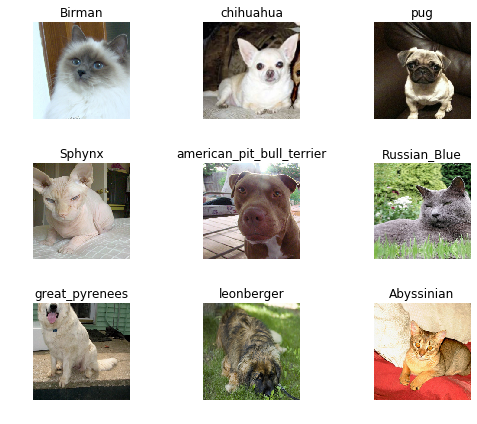

In [15]:
data.show_batch(rows=3, figsize=(7,6))

In [18]:
data.classes

['Abyssinian',
 'Bengal',
 'Birman',
 'Bombay',
 'British_Shorthair',
 'Egyptian_Mau',
 'Maine_Coon',
 'Persian',
 'Ragdoll',
 'Russian_Blue',
 'Siamese',
 'Sphynx',
 'american_bulldog',
 'american_pit_bull_terrier',
 'basset_hound',
 'beagle',
 'boxer',
 'chihuahua',
 'english_cocker_spaniel',
 'english_setter',
 'german_shorthaired',
 'great_pyrenees',
 'havanese',
 'japanese_chin',
 'keeshond',
 'leonberger',
 'miniature_pinscher',
 'newfoundland',
 'pomeranian',
 'pug',
 'saint_bernard',
 'samoyed',
 'scottish_terrier',
 'shiba_inu',
 'staffordshire_bull_terrier',
 'wheaten_terrier',
 'yorkshire_terrier']

In [19]:
len(data.classes)

37

In [20]:
data.c

37

In [21]:
help(create_cnn)

Help on function create_cnn in module fastai.vision.learner:

create_cnn(data:fastai.basic_data.DataBunch, arch:Callable, cut:Union[int, Callable]=None, pretrained:bool=True, lin_ftrs:Union[Collection[int], NoneType]=None, ps:Union[float, Collection[float]]=0.5, custom_head:Union[torch.nn.modules.module.Module, NoneType]=None, split_on:Union[Callable, Collection[Collection[torch.nn.modules.module.Module]], NoneType]=None, bn_final:bool=False, **kwargs:Any) -> fastai.basic_train.Learner
    Build convnet style learners.



In [22]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [23]:
learn

Learner(data=ImageDataBunch;

Train: LabelList
y: CategoryList (5912 items)
[Category Abyssinian, Category Abyssinian, Category Abyssinian, Category Abyssinian, Category Abyssinian]...
Path: /home/basil/.fastai/data/oxford-iiit-pet/images
x: ImageItemList (5912 items)
[Image (3, 400, 600), Image (3, 500, 375), Image (3, 500, 394), Image (3, 351, 500), Image (3, 363, 600)]...
Path: /home/basil/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList
y: CategoryList (1478 items)
[Category Birman, Category staffordshire_bull_terrier, Category Abyssinian, Category Sphynx, Category german_shorthaired]...
Path: /home/basil/.fastai/data/oxford-iiit-pet/images
x: ImageItemList (1478 items)
[Image (3, 335, 500), Image (3, 375, 500), Image (3, 500, 375), Image (3, 430, 625), Image (3, 332, 500)]...
Path: /home/basil/.fastai/data/oxford-iiit-pet/images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): Ba